In [1]:
%load_ext autoreload
%autoreload 2

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image
from IPython.core.display import HTML

In [77]:
! python src/generator.py -i . -o .

2


(-0.5, 1339.5, 1472.5, -0.5)

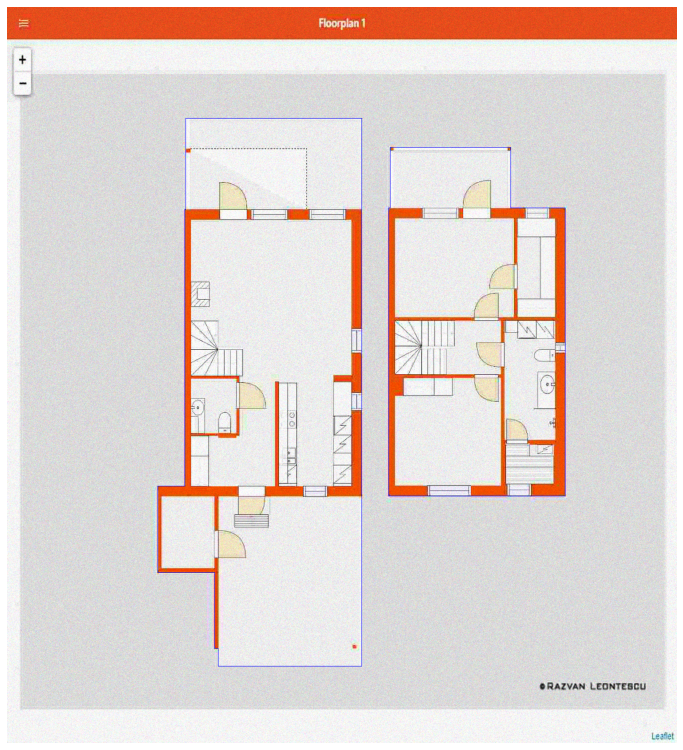

In [63]:
Image(url='./example_3.svg', width=800)

(-0.5, 1309.5, 1439.5, -0.5)

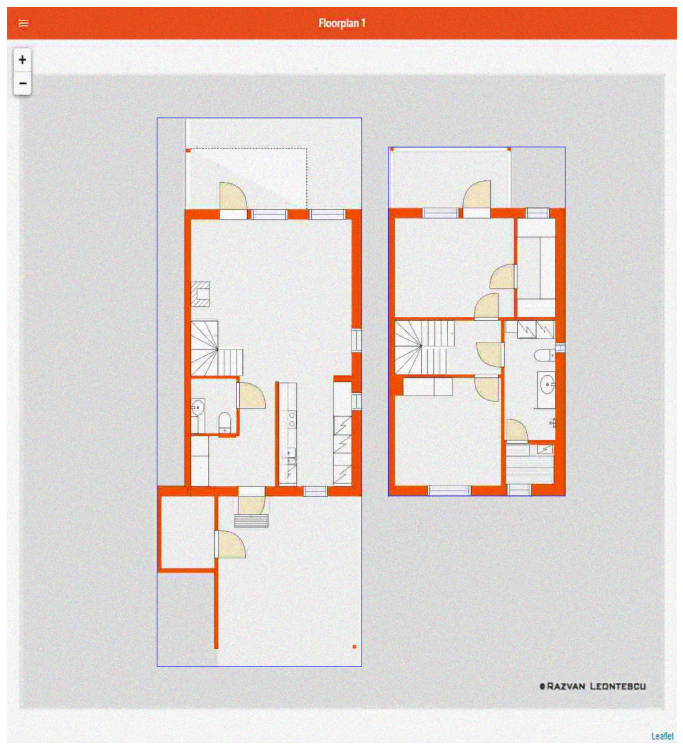

In [11]:
from src.ImageUtil import openRgb

im = openRgb('saved.png')
plt.figure(figsize=(12, 16))
plt.imshow(im)
plt.axis('off')

In [ ]:
a = [1, 2, 3, 4]

TypeError: list indices must be integers or slices, not list

In [ ]:
from src.ImageUtil import openRgb, qualityReduction, addNoise
import numpy as np


im = openRgb('saved.png')

im = Image.fromarray(im).convert('P', palette=Image.Palette.ADAPTIVE, colors=5)
im = np.array(im)
F = (im == 4).astype(np.int32)
im = im * (255 / 5)

results = (s for i, (s, v) in enumerate(shapes(F)))



total = im.shape[0] * im.shape[1]
poly = []
for l in results:
    display(l)
    pts = np.array(l['geometry']['coordinates'][0], dtype=np.int32)
    area = PolyArea(pts[:,0], pts[:,1])
    if 2 * area < total:
        poly.append(pts)

tmp = im.copy()
for idx, pts in enumerate(poly):
    cv2.polylines(tmp, [pts], True, (255, 0, 0), 2)

cv2.imwrite('mod.png', tmp)

{'type': 'Polygon',
 'coordinates': [[(914.0, 162.0),
   (914.0, 366.0),
   (913.0, 366.0),
   (908.0, 366.0),
   (908.0, 1336.0),
   (910.0, 1336.0),
   (910.0, 1335.0),
   (1039.0, 1335.0),
   (1039.0, 1336.0),
   (1187.0, 1336.0),
   (1187.0, 1335.0),
   (1307.0, 1335.0),
   (1307.0, 1336.0),
   (1391.0, 1336.0),
   (1391.0, 1335.0),
   (1503.0, 1335.0),
   (1504.0, 1335.0),
   (1504.0, 366.0),
   (1451.0, 366.0),
   (1451.0, 365.0),
   (1368.0, 365.0),
   (1368.0, 366.0),
   (1321.0, 366.0),
   (1321.0, 162.0),
   (914.0, 162.0)]]}

KeyError: 'geometry'

In [ ]:
from rasterio.features import shapes

results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) 
        in enumerate(shapes(gr)))

<generator object <genexpr> at 0x000002579B808CF0>

In [ ]:
lt = list(results)
lt

[{'properties': {'raster_val': 0.0},
  'geometry': {'type': 'Polygon',
   'coordinates': [[(225.0, 64.0),
     (225.0, 371.0),
     (340.0, 371.0),
     (340.0, 279.0),
     (353.0, 279.0),
     (353.0, 280.0),
     (362.0, 280.0),
     (362.0, 281.0),
     (368.0, 281.0),
     (368.0, 282.0),
     (373.0, 282.0),
     (373.0, 283.0),
     (376.0, 283.0),
     (376.0, 284.0),
     (380.0, 284.0),
     (380.0, 285.0),
     (383.0, 285.0),
     (383.0, 286.0),
     (385.0, 286.0),
     (385.0, 287.0),
     (388.0, 287.0),
     (388.0, 288.0),
     (390.0, 288.0),
     (390.0, 289.0),
     (392.0, 289.0),
     (392.0, 290.0),
     (394.0, 290.0),
     (394.0, 291.0),
     (396.0, 291.0),
     (396.0, 292.0),
     (397.0, 292.0),
     (397.0, 293.0),
     (399.0, 293.0),
     (399.0, 294.0),
     (400.0, 294.0),
     (400.0, 295.0),
     (402.0, 295.0),
     (402.0, 296.0),
     (403.0, 296.0),
     (403.0, 297.0),
     (404.0, 297.0),
     (404.0, 298.0),
     (405.0, 298.0),
     (405.0,

In [ ]:
pts = np.array(lt[0]['geometry']['coordinates'][0], dtype=np.int32)

In [ ]:
tmp = gr.copy()

cv2.polylines(tmp, [pts], True, (255, 0, 0), 2)

cv2.imwrite('mod.png', tmp)

True

In [ ]:
%%javascript

// sleep time expects milliseconds
function sleep (time) {
  return new Promise((resolve) => setTimeout(resolve, time));
}

let tmp = document.body.innerHTML;
document.body.innerHTML = "<h1>HELLO WORLD!</h1>";

// Usage!
sleep(500).then(() => {
    document.body.innerHTML = tmp;
});

<IPython.core.display.Javascript object>

In [ ]:
from src.

In [ ]:
import numpy as np
im_red

array([[[240,   7, 218],
        [240,   7, 218],
        [240,   7, 218],
        ...,
        [245,   9, 214],
        [245,   9, 214],
        [245,   9, 214]],

       [[240,   7, 218],
        [240,   7, 218],
        [240,   7, 218],
        ...,
        [245,   9, 214],
        [245,   9, 214],
        [245,   9, 214]],

       [[240,   7, 218],
        [240,   7, 218],
        [240,   7, 218],
        ...,
        [245,   9, 214],
        [245,   9, 214],
        [245,   9, 214]],

       ...,

       [[249,  14, 218],
        [249,  14, 218],
        [249,  14, 218],
        ...,
        [245,   9, 214],
        [245,   9, 214],
        [245,   9, 214]],

       [[249,  14, 218],
        [249,  14, 218],
        [249,  14, 218],
        ...,
        [245,   9, 214],
        [245,   9, 214],
        [245,   9, 214]],

       [[249,  14, 218],
        [249,  14, 218],
        [249,  14, 218],
        ...,
        [245,   9, 214],
        [245,   9, 214],
        [245,   9, 214]]

In [ ]:
import numpy as np
import cv2

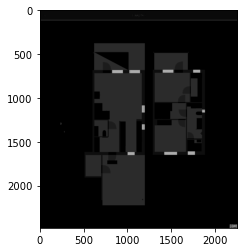

In [ ]:
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

plt.imshow(im_hsv[:,:,0], cmap='gray')

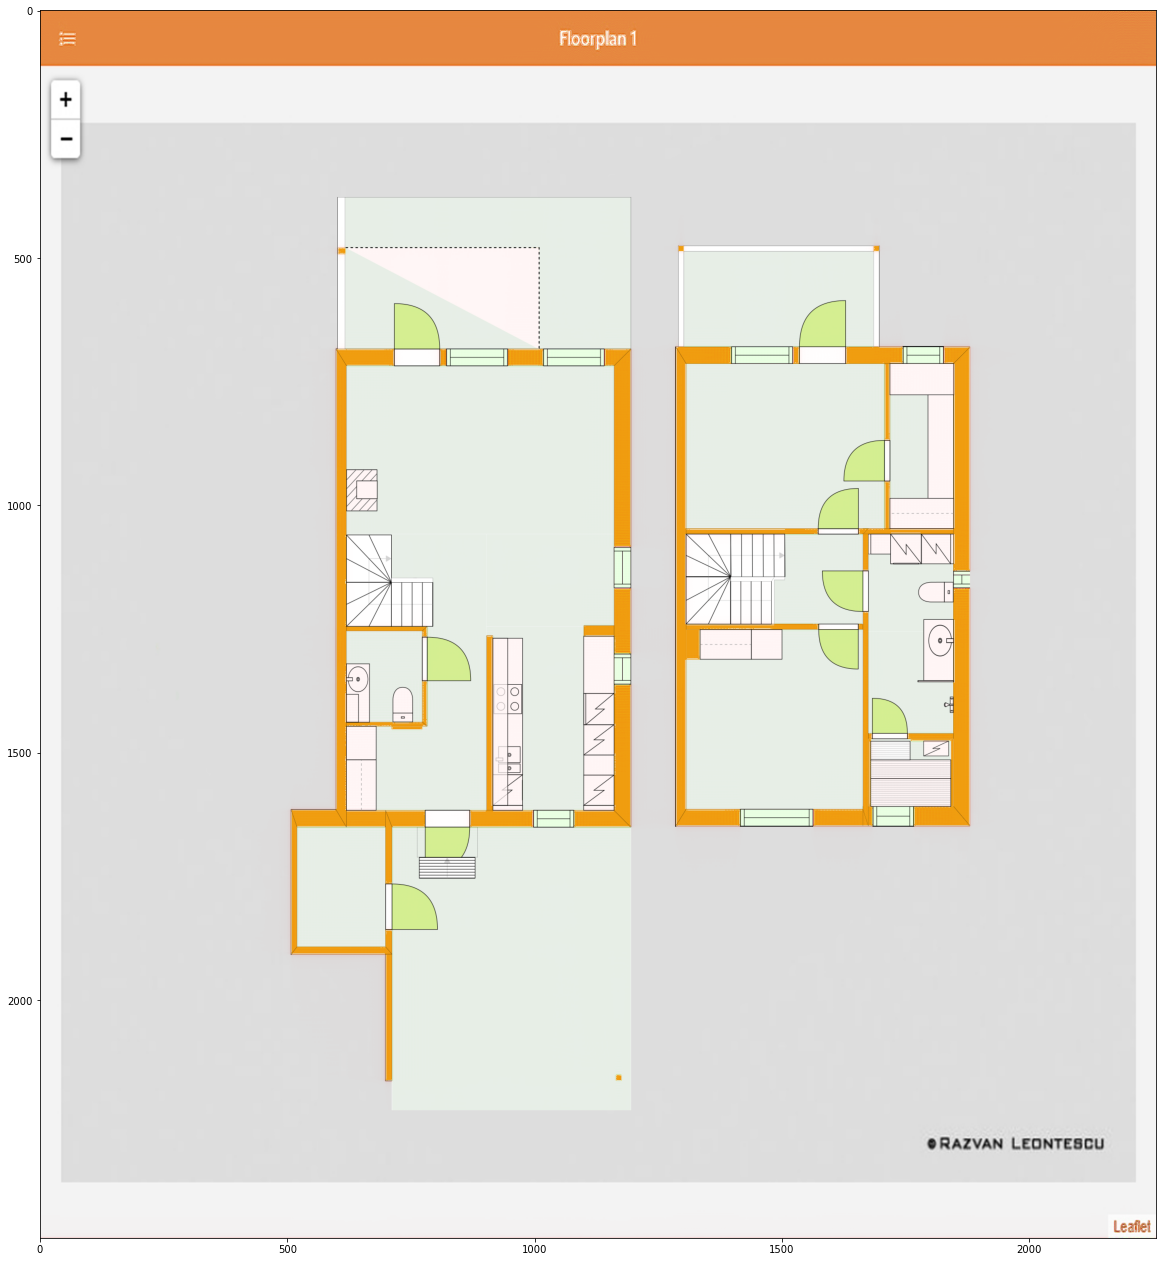

In [ ]:
im_hsv = cv2.cvtColor(im, cv2.COLOR_RGB2HSV)

(h, w, _) = im.shape
center = (int(w/2), int(h/2))

Y, X = np.ogrid[:h, :w]
dist = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

fixed = min(h, w) / 3
mask = np.where(dist > fixed, fixed, fixed / 16)
mask = 2 - mask / fixed

for i in range(0, 2):
    h_fft = np.fft.fftshift(np.fft.fft2(im_hsv[:,:,i]))

    n_fft = h_fft * mask

    n_hue = abs(np.fft.ifft2(n_fft))

    im_hsv[:,:,i] = n_hue

    
im_n = cv2.cvtColor(im_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(20, 24))
plt.imshow(im_n)
plt.show()

In [ ]:
d = {}

def test(d) :
    d['123'] = 123

test(d)
print(d)

{'123': 123}


In [ ]:
x = "hello"

#if condition returns False, AssertionError is raised:
assert x == "ehe", "x should be 'hello'"

AssertionError: x should be 'hello'

In [ ]:
plt.imshow(img)

NameError: name 'img' is not defined

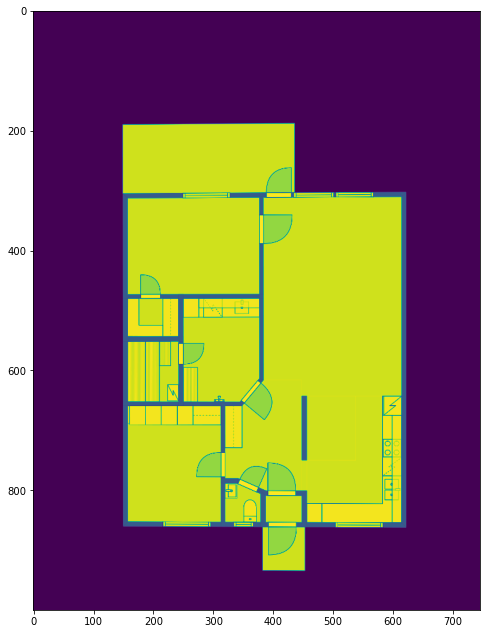

In [ ]:
im = similarity_feature(img, nimg)

plt.figure(figsize = (8,12))
plt.imshow(im)
plt.show()